In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler


In [2]:
df = pd.read_csv('Total_Building.csv',parse_dates=True,index_col='Date')
df

,z1_Light(kW),z1_Plug(kW),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),z2_Light(kW),z2_Plug(kW),z3_Light(kW),z3_Plug(kW),z4_Light(kW)
Date,,,,,,,,,,,
2018-07-01 00:00:00,12.94,18.56,45.24,0.01,0.01,0.00,13.76,17.64,10.92,0.89,35.76
2018-07-01 00:01:00,12.97,18.55,45.28,0.02,0.01,0.01,13.76,17.21,10.95,0.87,35.81
2018-07-01 00:02:00,12.97,18.55,45.24,0.01,0.01,0.01,13.79,17.18,10.94,0.86,35.78
2018-07-01 00:03:00,12.98,18.58,45.26,0.02,0.01,0.00,13.81,16.64,10.94,0.85,35.83
2018-07-01 00:04:00,13.01,18.60,45.22,0.02,0.01,0.01,13.83,15.69,10.97,0.85,35.86
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,0.02,0.01,2.22,0.03,0.00,0.01,8.85,27.00,10.98,1.25,18.28
2019-12-31 23:56:00,0.02,0.02,13.14,0.02,0.01,0.00,8.86,27.15,10.98,1.25,18.27
2019-12-31 23:57:00,0.01,0.01,51.20,0.03,0.01,0.01,8.90,20.62,11.03,1.24,18.30


In [3]:
final_df=pd.DataFrame(columns=['lights','acs','plug'])
final_dffinal_df=pd.DataFrame(columns=['lights','acs','plug'])
final_df

,lights,acs,plug


In [4]:
final_df['lights']=df['z1_Light(kW)']+df['z2_Light(kW)']+df['z3_Light(kW)']+df['z4_Light(kW)']
final_df['acs']=df['z2_AC1(kW)']+df['z2_AC2(kW)']+df['z2_AC3(kW)']+df['z2_AC4(kW)']
final_df['plug']=df['z1_Plug(kW)']+df['z2_Plug(kW)']+df['z3_Plug(kW)']

In [5]:
final_df['Power_consumption']=final_df['lights']+final_df['acs']+final_df['plug']


In [6]:
final_df=final_df.fillna(final_df.mean())

In [7]:
df1=final_df.resample('h').mean()
df1

,lights,acs,plug,Power_consumption
Date,,,,
2018-07-01 00:00:00,73.675167,45.472833,36.477000,155.625000
2018-07-01 01:00:00,73.970167,45.849500,36.867333,156.687000
2018-07-01 02:00:00,73.782667,45.831833,36.668000,156.282500
2018-07-01 03:00:00,73.122167,45.616667,35.607667,154.346500
2018-07-01 04:00:00,83.146000,45.502833,33.766000,162.414833
...,...,...,...,...
2019-12-31 19:00:00,68.292167,23.921333,19.171833,111.385333
2019-12-31 20:00:00,68.485333,28.528000,19.147667,116.161000
2019-12-31 21:00:00,53.983000,22.726333,19.749833,96.459167


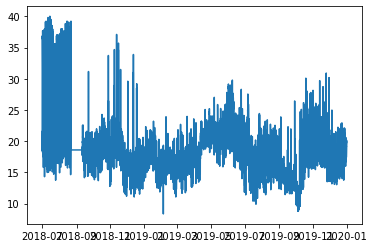

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1.plug)

In [9]:
#scaler=MinMaxScaler(feature_range=(0,1))
#df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(df1['Power_consumption']).reshape(-1,1))


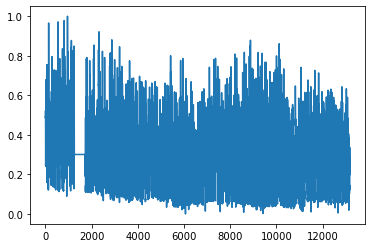

In [10]:

plt.plot(y)

In [11]:
#train=int(len(y)*0.65)
#test=len(y)-train
#train_val,test_val=y[0:train],y[train:len(y)]
#train=y.iloc[:x]
#test=len(y)-train#.iloc[x:]
#print(train.shape,test.shape)

In [12]:
training_size=int(len(y)*0.65)
test_size=len(df1)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(df1),:1]

In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 24
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(24,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 24, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
134/134 [==============================] - 7s 32ms/step - loss: 0.0258 - val_loss: 0.0180
Epoch 2/100
134/134 [==============================] - 4s 27ms/step - loss: 0.0136 - val_loss: 0.0160
Epoch 3/100
134/134 [==============================] - 4s 27ms/step - loss: 0.0111 - val_loss: 0.0091
Epoch 4/100
134/134 [==============================] - 4s 27ms/step - loss: 0.0073 - val_loss: 0.0054
Epoch 5/100
134/134 [==============================] - 5s 38ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 6/100
134/134 [==============================] - 5s 35ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 7/100
134/134 [==============================] - 5s 35ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 8/100
134/134 [==============================] - 4s 34ms/step - loss: 0.0049 - val_loss: 0.0059
Epoch 9/100
134/134 [==============================] - 5s 36ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 10/100
134/134 [==============================] - 4s 33ms/step - loss: 0.004

In [57]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


144/144 [==============================] - 3s 20ms/step


In [58]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [59]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


116.9103923881495

In [60]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

106.22572696254646

In [61]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(test_predict, y_test))
# print ('MSE:', metrics.mean_squared_error(test_predict, y_test))
print ('RSME:', np.sqrt(metrics.mean_absolute_error(test_predict, y_test)))

print('MSE: ',np.sqrt(mean_squared_error(test_predict, y_test)))

# from sklearn.metrics import r2_score
# Accuracy=r2_score(test_predict, y_test)*100
# print(" Accuracy of the model is %.2f" %Accuracy)

MAE: 98.8968260202148
RSME: 9.944688331979782
MSE:  106.22572696254646


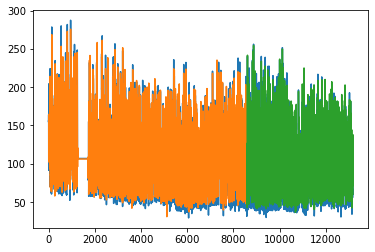

In [62]:
### Plotting 
# shift train predictions for plotting
look_back=24
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
len(test_data)

4612

In [64]:
x_input=test_data[4588:].reshape(1,-1)
x_input

array([[0.19760728, 0.21305714, 0.2751291 , 0.27177201, 0.2966867 ,
        0.2948215 , 0.21266898, 0.10228732, 0.1045581 , 0.11630598,
        0.10914036, 0.12065057, 0.12433123, 0.14539604, 0.14457905,
        0.12040773, 0.20239104, 0.28953205, 0.26670344, 0.31813708,
        0.33664306, 0.26029732, 0.22297083, 0.19931037]])

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input

[0.19760728097527458,
 0.21305713643561858,
 0.2751291040091348,
 0.2717720122658497,
 0.29668669640988815,
 0.29482150192073703,
 0.2126689848123568,
 0.10228731745248533,
 0.10455810132501143,
 0.11630598489760806,
 0.10914035717699459,
 0.12065057053767721,
 0.12433122960750835,
 0.14539604382432042,
 0.14457905247086605,
 0.12040773358202593,
 0.20239103983301088,
 0.2895320480197163,
 0.26670343665959684,
 0.31813707887809334,
 0.336643063259027,
 0.2602973202683607,
 0.2229708259814876,
 0.19931036887966913]

In [67]:
x_input

array([[0.19760728, 0.21305714, 0.2751291 , 0.27177201, 0.2966867 ,
        0.2948215 , 0.21266898, 0.10228732, 0.1045581 , 0.11630598,
        0.10914036, 0.12065057, 0.12433123, 0.14539604, 0.14457905,
        0.12040773, 0.20239104, 0.28953205, 0.26670344, 0.31813708,
        0.33664306, 0.26029732, 0.22297083, 0.19931037]])

In [68]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=24
i=0
while(i<30):
    
    if(len(temp_input)>24):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_steps, 1)
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.19849913]
25
1 day input [0.21305714 0.2751291  0.27177201 0.2966867  0.2948215  0.21266898
 0.10228732 0.1045581  0.11630598 0.10914036 0.12065057 0.12433123
 0.14539604 0.14457905 0.12040773 0.20239104 0.28953205 0.26670344
 0.31813708 0.33664306 0.26029732 0.22297083 0.19931037 0.19849913]
1 day output [[0.19774888]]
2 day input [0.2751291  0.27177201 0.2966867  0.2948215  0.21266898 0.10228732
 0.1045581  0.11630598 0.10914036 0.12065057 0.12433123 0.14539604
 0.14457905 0.12040773 0.20239104 0.28953205 0.26670344 0.31813708
 0.33664306 0.26029732 0.22297083 0.19931037 0.19849913 0.19774888]
2 day output [[0.19953921]]
3 day input [0.27177201 0.2966867  0.2948215  0.21266898 0.10228732 0.1045581
 0.11630598 0.10914036 0.12065057 0.12433123 0.14539604 0.14457905
 0.12040773 0.20239104 0.28953205 0.26670344 0.31813708 0.33664306
 0.26029732 0.22297083 0.19931037 0.19849913 0.19774888 0.19953921]
3 day output [[0.21391106]]
4 day input [0.2966867  0.2948215  0.21266898 0.10228732 0

In [53]:
day_new=np.arange(1,25)
day_pred=np.arange(25,55)

In [54]:
len(y)

13176

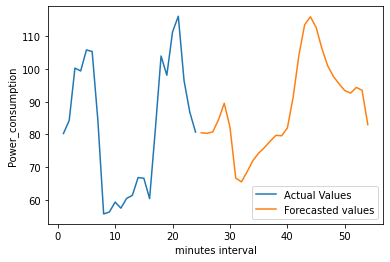

In [69]:
plt.plot(day_new,scaler.inverse_transform(y[13152:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.xlabel('minutes interval')
plt.ylabel('Power_consumption')
plt.legend(['Actual Values','Forecasted values'])

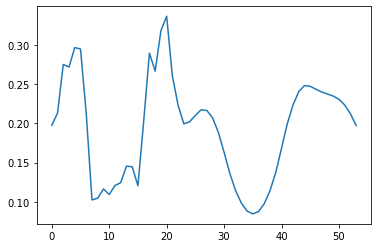

In [58]:
df3=y.tolist()
df3.extend(lst_output)
plt.plot(df3[13152:])

In [59]:
df3=scaler.inverse_transform(df3).tolist()

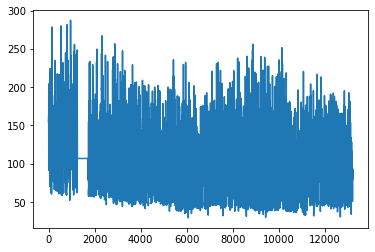

In [60]:
plt.plot(df3)